<a href="https://colab.research.google.com/github/simulate111/Johdatus-teko-lyyn-Introduction-to-Artificial-Intelligence/blob/main/JT_H2_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import os
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = (15, 7)

In [4]:
pip install imblearn umap-learn onedrivedownloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=168e562fa0700bcd14105c83c3c43c675ff573b4d177fde795fd2ab7c1847340
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [5]:
from onedrivedownloader import download

link2data = 'https://unioulu-my.sharepoint.com/:u:/g/personal/jukmaatt_univ_yo_oulu_fi/EccjaL-zb_JKiZA_OBR3-VsBOa69ZTuk-yDw7j7hsKqaFw?e=ZqIJk0'

if not os.path.exists('./data'):
    print('Downloading data')
    download(link2data, filename='./files.zip', unzip=True, unzip_path='./')

100%|██████████| 114k/114k [00:00<00:00, 514kiB/s] 


Unzipping file...


Extracting files: 100%|██████████| 7/7 [00:00<00:00, 2444.44it/s]


# <center>521160P Introduction to artificial intelligence<br><br>Exercise #2<br><br>Regression<br></center>

In this exercise we are working with fitting regression models to data and logistic regression. **Look return deadlines from moodle**. It is possible to get 4 points (2p + 2p) from this exercise.

If you have any questions related to exercises or you face any problems during this exercise please use moodle forum for **programming exercise 2**.

**First fill in your group information (name and student number)**

# Group member information :

* **Member 1 :** `... `
* **Member 2 :** `... `
* **Member 3 :** `... `

# Task 1. Fitting regression models

In this task, a linear, polynomial, and exponential regression model is created to determine the dependence of the stopping distance and speed of a car. The task uses data collected in the 1920s on stopping distances by cars at different speeds. The stopping distance consists of the braking distance and the distance corresponding to the response time. The original data contains a total of 50 samples and two variables: stopping distance in feet and speed in miles per hour.

Convert the stopping distance to meters and the speed to km / h and place the data samples on the graph.

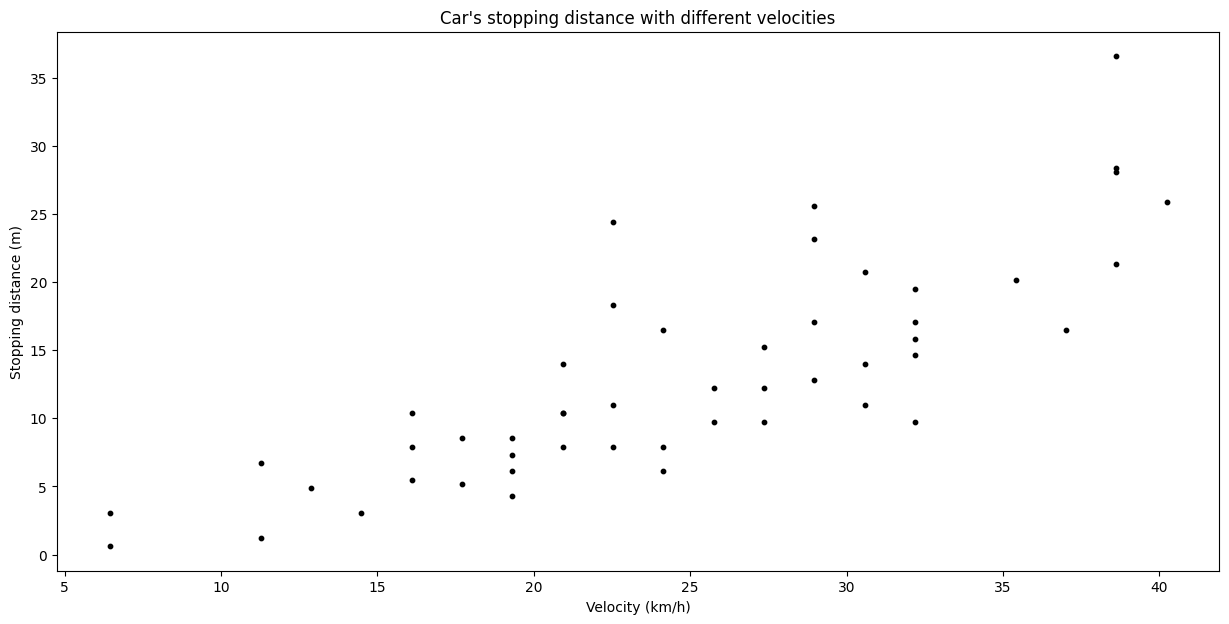

In [6]:

# Load data cars into numpy-lists, variable X refers car's velocity and variable Y refers to stopping distance
X, Y = np.loadtxt('data/cars.txt', delimiter=',', unpack=True)

# Convert variable X and Y to km/h and meters
X = X*1.609344
Y = Y*0.3048

# place data samples to graph
plt.scatter(X, Y, color="black",s=10, marker='o')
plt.title('Car\'s stopping distance with different velocities')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Stopping distance (m)')
plt.show()

In machine learning, teaching data is used to teach the model and test data is used to evaluate the performance of the model being taught. In this case, teaching means determining the appropriate function parameters based on the samples of teaching data. Initially, the data is divided into teaching data and test data by the [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of the scikit-learn library. The function takes the x-axis score, the y-axis score, and the absolute size of the test data as parameters. 70% of the samples, i.e. 35 samples, are used to teach the model and 30% of the samples, i.e. 15 samples, to test the model.

Your task is to evaluate the performance of the linear, polynomial, and exponential regression model using the square of the correlation coefficient and the root mean square error, and to predict the stopping distance of the car from a given speed with different models.

## Linear regression model

Let's teach linear regression model with teaching data. This can be done with the numpy library functions [np.polyfit ()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) and [np.poly1d()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html). Place samples of teaching data on the graph as blue dots and samples of test data as red dots.

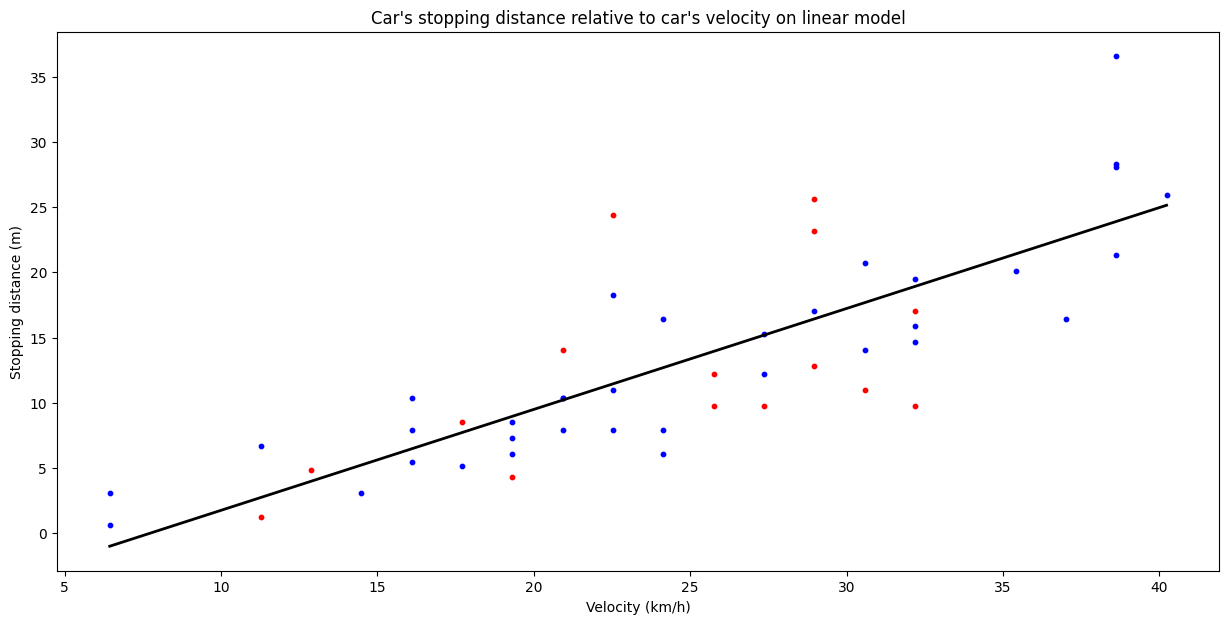

The equation of the fitted line: y = 0.7738 x - 5.9878


In [7]:
# Divide data to teaching data and testing data
X_teaching, X_test, Y_teaching, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# Place samples of teaching data as blue dots on the graph and samples of test data as red dots
plt.scatter(X_teaching, Y_teaching, color="blue",s=10, marker='o')
plt.scatter(X_test, Y_test, color="red",s=10, marker='o')
plt.title('Car\'s stopping distance relative to car\'s velocity on linear model')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Stopping distance (m)')

# Optimize line's parameters k and b with least squares methdod using polyfit-function from numpy library
# Function uses x-coordinates, y-coordinates and degree of polynomial function as parameters
# Line is first degree polynomial function
line_parameters = np.polyfit(X_teaching, Y_teaching, 1)

# Create linear model using numpy-library's poly1d function after finding optimal line parameters
linear_model = np.poly1d(line_parameters)

# Draw line on the graph in range [min(X_teaching), max(X_teaching)]
X_line = np.linspace(min(X_teaching), max(X_teaching))
Y_line = linear_model(X_line)
plt.plot(X_line, Y_line, c='black', linewidth=2)
plt.show()

def sign(number):
    """
    In this function we get sign of equation parameter for printing
    """
    if number >= 0:
        return '+'
    return '-'

# Print the equation of the fitted line
print('The equation of the fitted line: y = {} x {} {}'.format(round(line_parameters[0],4), sign(line_parameters[1]), abs(round(line_parameters[1],4))))


The performance of the fitted linear model is then evaluated using test data. The square of the correlation coefficient and the root mean square error, which are calculated by the following equations, are used as performance measures.

\begin{equation}
r^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} = 1 - \frac{\sum\limits_{i=1}^n (Y_{i} - f(X_{i}))^2}{\sum\limits_{i=1}^n (Y_{i} - \bar{Y})^2}
\end{equation}

\begin{equation}
MSE = \frac{1}{n} \sum\limits_{i=1}^n (Y_{i} - f(X_{i}))^2
\end{equation}

Implement performance measurement equations above using numpy library functions [np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html), [np.square()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.square.html), [np.mean()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html). For the mean square error, you also need the number of samples.

After getting measurements check for the linear model that you get the values corresponding to the ready-made scikit-learn library functions [sm.r2_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) and [sm.mean_squared_error()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

In [8]:
def mean_square_error(Y,Y_predict):
    """
    In this function calculate mean square error when you know y-coordinate values for test data
    and predicted y-coordinate values
    """
    sample_ammount = Y.size
    #-------- YOUR CODE HERE --------
    # Calculate mean square error (Tip: you need np.sum() and np.square() functions from numpy library)
    mse = np.sum(np.square(Y - Y_predict)) / sample_ammount
     ##############################################
    # Function returns mean square error
    #-----------------------------------
    return mse
    #################################################

def square_of_correlation_coefficient(Y, Y_predict):
    """
    In this function calculate square of the correlation coefficient when you know y-coordinate values for test data
    and predicted y-coordinate values
    """
    #-------- YOUR CODE HERE --------
    # Calculate SSE (Tip: you need np.sum() and np.square from numpy library)
    SSE = np.sum(np.square(Y - Y_predict))
    ####################################################
    # Calculate SST (Tip: you need np.sum(), np.square() and np.mean() from numpy library)
    SST = np.sum(np.square(Y - np.mean(Y)))
    #################################################################################
    # Calculate square of the correlation coefficient
    r_squared = 1 - (SSE / SST)
    #########################################################
    # Function returns square of the correlation coefficient
    return r_squared
    #########################################################
    #-----------------------------------

print('Square of correlation coefficient for linear model using scikit-learn library\'s function: ', sm.r2_score(Y_test, linear_model(X_test)))
print('Mean square error for linear model using scikit-learn library\'s function: ', sm.mean_squared_error(Y_test, linear_model(X_test)))

print('\nSquare of correlation coefficient for linear model using function you implemented: ', square_of_correlation_coefficient(Y_test, linear_model(X_test)))
print('Mean square error for linear model using function you implemented: ', mean_square_error(Y_test, linear_model(X_test)))

Square of correlation coefficient for linear model using scikit-learn library's function:  0.28371351685031754
Mean square error for linear model using scikit-learn library's function:  35.5191615727737

Square of correlation coefficient for linear model using function you implemented:  0.28371351685031754
Mean square error for linear model using function you implemented:  35.5191615727737


## Polynomial regression model

The teaching of the polynomial regression model with the teaching data is performed. Place samples of teaching data on the graph as blue dots and samples of test data as red dots.

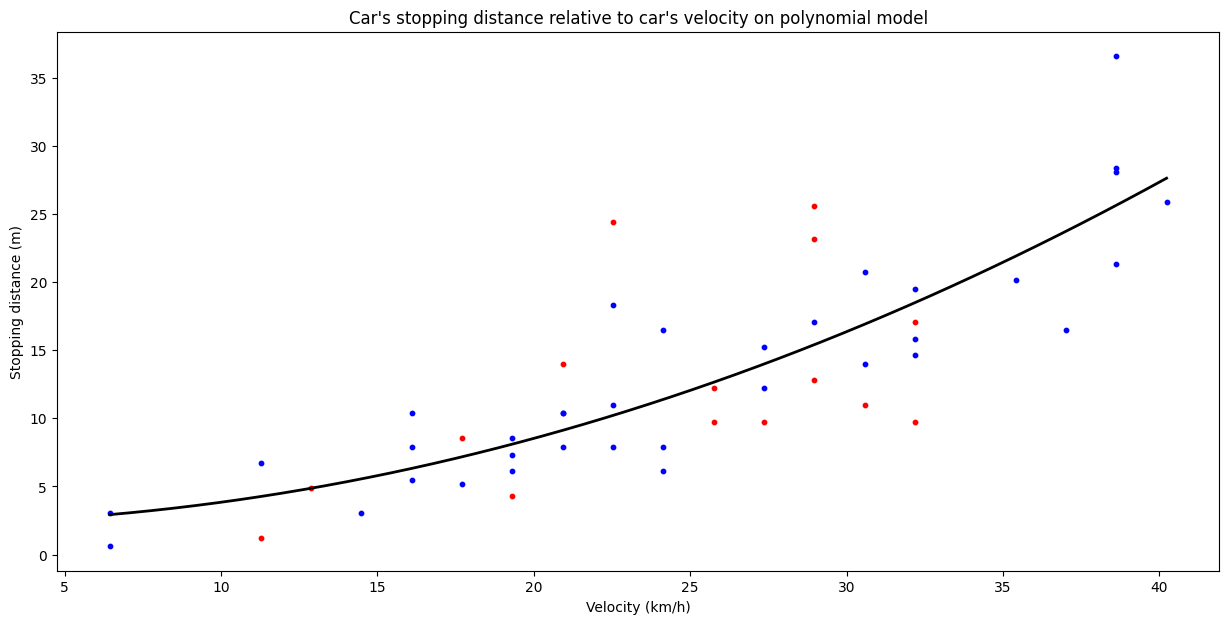

Equation of fitted parabola:  y = 0.0157 x^2 - 0.0029 x + 2.2965


In [9]:
# Place samples of teaching data as blue dots on the graph and samples of test data as red dots
plt.scatter(X_teaching, Y_teaching, color="blue",s=10, marker='o')
plt.scatter(X_test, Y_test, color="red",s=10, marker='o')

plt.title('Car\'s stopping distance relative to car\'s velocity on polynomial model')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Stopping distance (m)')

# Optimize parabola's parameters with least squares method using polyfit function from numpy library
parabola_parameters = np.polyfit(X_teaching, Y_teaching, 2)

# Create polynomial model with poly1d function from numpy library after optimal parameters for parabola are found
polynomial_model = np.poly1d(parabola_parameters)

# Draw parabola on graph in range [min(X_teaching), max(X_teaching)]
X_parabola = np.linspace(min(X_teaching), max(X_teaching))
Y_parabola = polynomial_model(X_parabola)
plt.plot(X_parabola, Y_parabola, c='black', linewidth=2)
plt.show()

# Print fitted parabola's equation
print('Equation of fitted parabola:  y = {} x^2 {} {} x {} {}'.format(round(parabola_parameters[0],4), sign(parabola_parameters[1]), abs(round(parabola_parameters[1],4)),sign(parabola_parameters[2]), abs(round(parabola_parameters[2],4))))

Calculate the square of the correlation coefficient and the mean square error for the polynomial model.

In [10]:
print('Square of correlation coefficient for polynomial model: ', square_of_correlation_coefficient(Y_test, polynomial_model(X_test)))
print('Mean square error for polynomial model: ', mean_square_error(Y_test, polynomial_model(X_test)))

Square of correlation coefficient for polynomial model:  0.2447912811499232
Mean square error for polynomial model:  37.449234540975986


## Exponential regression model

Teaching an exponential regression model with teaching data is performed. Place samples of teaching data in the graph as blue dots and samples of test data in red dots.

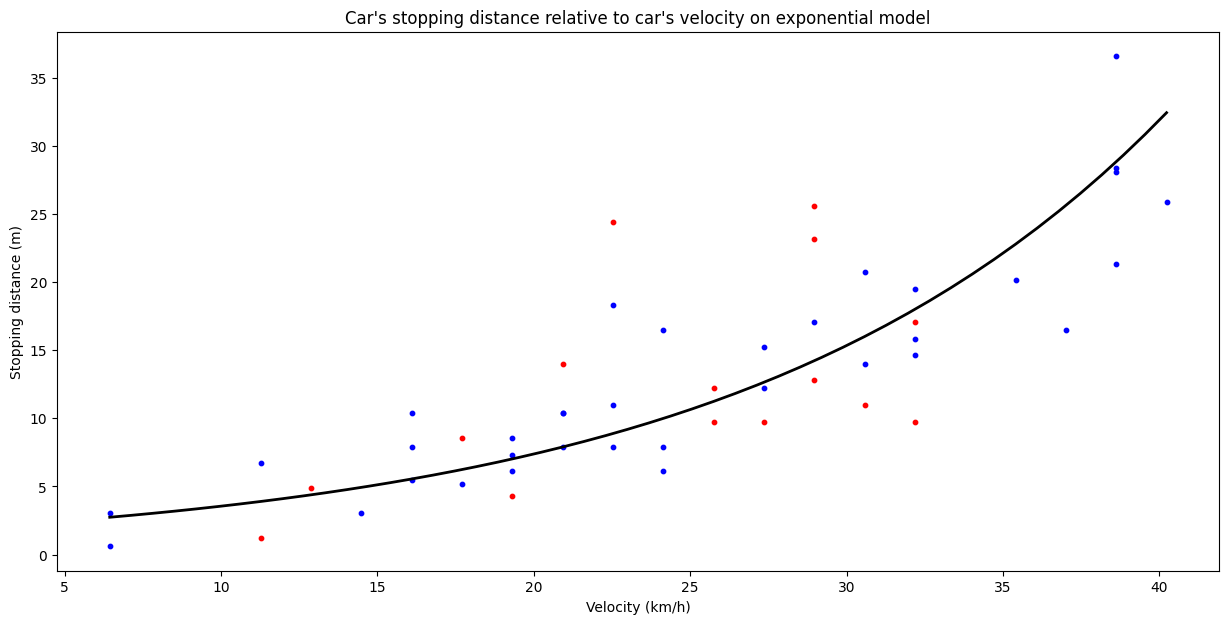

Equation of fitted exponential function:  y = exp^(0.0732 x + 0.5354)


In [11]:
# Place samples of teaching data as blue dots on the graph and samples of test data as red dots
plt.scatter(X_teaching, Y_teaching, color="blue",s=10, marker='o')
plt.scatter(X_test, Y_test, color="red",s=10, marker='o')

plt.title('Car\'s stopping distance relative to car\'s velocity on exponential model')
plt.xlabel('Velocity (km/h)')
plt.ylabel('Stopping distance (m)')

def exponential_model(x):
    """
    Tässä funktiossa toteutetaan eksponentiaalinen regressiomalli
    """
    global exponential_function_parameters
    # Optimize exponential function parameters with least squares methdod using polyfit-function from numpy library
    # ln(y) = kx + b <=> y = exp(kx+b)

    exponential_function_parameters = np.polyfit(X_teaching, np.log(Y_teaching), 1)
    return np.exp(exponential_function_parameters[0]*x + exponential_function_parameters[1])

# Draw exponential model on graph in range [min(X_teaching), max(X_teaching)]
X_exponential = np.linspace(min(X_teaching), max(X_teaching))
Y_exponential = exponential_model(X_exponential)
plt.plot(X_exponential, Y_exponential, c='black', linewidth=2)
plt.show()

# Print equation of fitted exponential function
print('Equation of fitted exponential function:  y = exp^({} x {} {})'.format(round(exponential_function_parameters[0],4), sign(exponential_function_parameters[1]), abs(round(exponential_function_parameters[1],4))))

Calculate the square of the correlation coefficient and the mean square error for the exponential model.

In [12]:
print('Square of correlation coefficient for exponential model: ', square_of_correlation_coefficient(Y_test, exponential_model(X_test)))
print('Mean square error for exponential model: ', mean_square_error(Y_test, exponential_model(X_test)))

Square of correlation coefficient for exponential model:  0.1728967969789661
Mean square error for exponential model:  41.01433294717586


**Which model worked best for the test data based on performance measurements?**

`Linear regression model has the highest R-squared value (0.2837) and the lowest mean square error (35.5192).`

Finally using different models predict how long the stopping distance will be when it is known that the motorist is braking from speed of 80 km/h.

In [13]:
print("Stopping distance from velocity of 80 km/h predicted using linear model: ", round(linear_model(80), 2), "meters")
print("Stopping distance from velocity of 80 km/h predicted using polynomial model: ", round(polynomial_model(80), 2), "meters")
print("Stopping distance from velocity of 80 km/h predicted using exponential model: ", round(exponential_model(80), 2), "meters")

Stopping distance from velocity of 80 km/h predicted using linear model:  55.92 meters
Stopping distance from velocity of 80 km/h predicted using polynomial model:  102.66 meters
Stopping distance from velocity of 80 km/h predicted using exponential model:  595.04 meters


**According to the traffic safety website, the stopping distance of a modern car on a dry road at a speed of 80 km/h is exactly 50 meters. Based on this knowledge, which one or more of the models taught give realistic predictions for this test sample?**

`Linear model has the closest results to 50 m, which is 55.92 meters.`

# Task 2. Logistic regression

On second task logistic regression classifiers to predict the risk of developing diabetes in women of the Pima Native American tribe is created. The data used in the task have been collected from women over the age of 21 in the Pima Native American tribe by measuring various variables that correlate with diabetes. The variables used are number of pregnancies, fasting plasma glucose, blood pressure, skin thickness, blood insulin, body mass index, coefficient calculated from the incidence of diabetes in the family, and age. The data include 500 patients with diabetes and 268 healthy patients.

Download data and evaluate distribution of variables between diabetic and healthy patients using box-segment patterns and histograms.In the box-segment pattern, the yellow line indicates the location of the median, the top and bottom of the box the median of the upper and lower quarters, and the maximum and minimum value of the segment data that do not contain outliers. Deviating observations are marked in the box-segment pattern with circles.

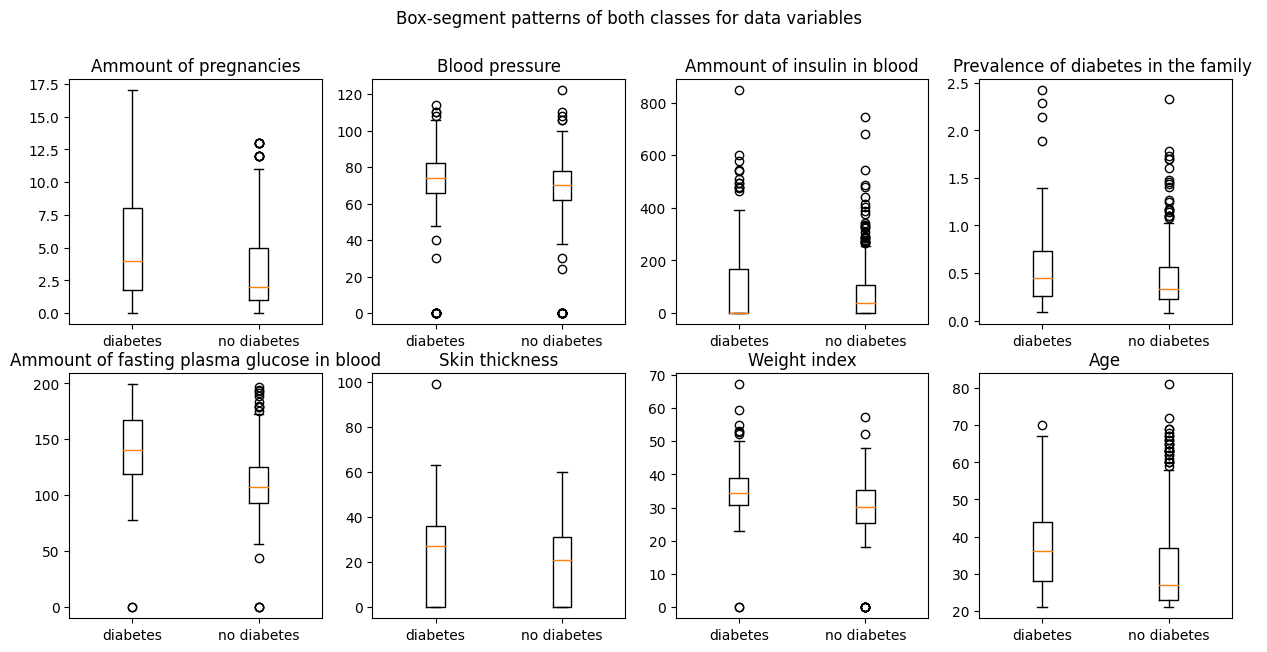

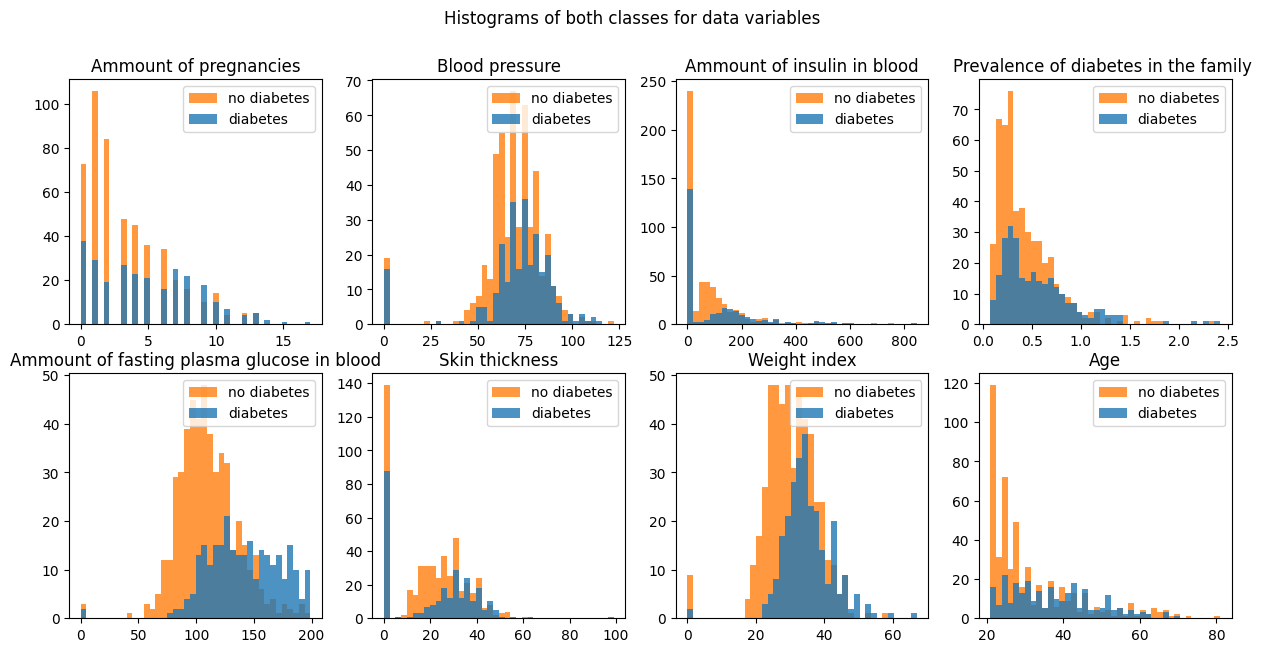

In [14]:
# Load data pima-indians. Variable data refers to data's values and variable classes refers to data's class information
data = np.genfromtxt('data/pima-indians.txt', delimiter=',', usecols = (0,1,2,3,4,5,6,7))
classes = np.genfromtxt('data/pima-indians.txt', delimiter=',', usecols = (8))

data_diabetes = data[np.where(classes == 1)]
data_no_diabetes = data[np.where(classes == 0)]

# From the box-segment patterns analyze which variables correlate best with the class information
headers = ['Ammount of pregnancies','Ammount of fasting plasma glucose in blood','Blood pressure','Skin thickness','Ammount of insulin in blood','Weight index','Prevalence of diabetes in the family ','Age']
fig, ax = plt.subplots(2, 4)
for i in range(2):
    for j in range(4):
        ax[i, j].boxplot([data_diabetes[:,j*2+i], data_no_diabetes[:,j*2+i]], positions=[0,1])
        ax[i, j].set_title(headers[j*2+i])
        ax[i, j].axes.set_xticklabels(['diabetes','no diabetes'])
plt.suptitle('Box-segment patterns of both classes for data variables ')

fig, ax = plt.subplots(2, 4)
for i in range(2):
    for j in range(4):
        ax[i, j].hist([data_diabetes[:,j*2+i],data_no_diabetes[:,j*2+i]], histtype='stepfilled', alpha=0.8, bins=40, label=['diabetes', 'no diabetes'])
        ax[i, j].legend(loc='upper right')
        ax[i, j].set_title(headers[j*2+i])
plt.suptitle('Histograms of both classes for data variables')
plt.show()

Based on the box-segment patterns and histograms, the two variables that best correlate with suffering from diabetes are selected. The most obvious differences in the distributions of the categories "diabetes" and "non-diabetes" differ in the variable fasting plasma glucose. This is seen as for example in the box-segment pattern of a variable as clearly separate boxes for data classes. When choosing the second variable the differences between the categories are not as clear but we end up with the variable weight index.

Next, the data is divided into teaching data and test data in a 60:40 division ratio. The logistic regression classifiers for the selected variables individually and for their combination are then taught. Finally, the classification results of the three taught classifiers are compared.

An example of a logistic regression classifier for fasting plasma glucose is taught. Draw the created model and place the test data samples on the same graph. Finally, the classification accuracy is calculated for the test data. Classification accuracy simply tells you what percentage of the test data samples the classifier classified into the correct categories.

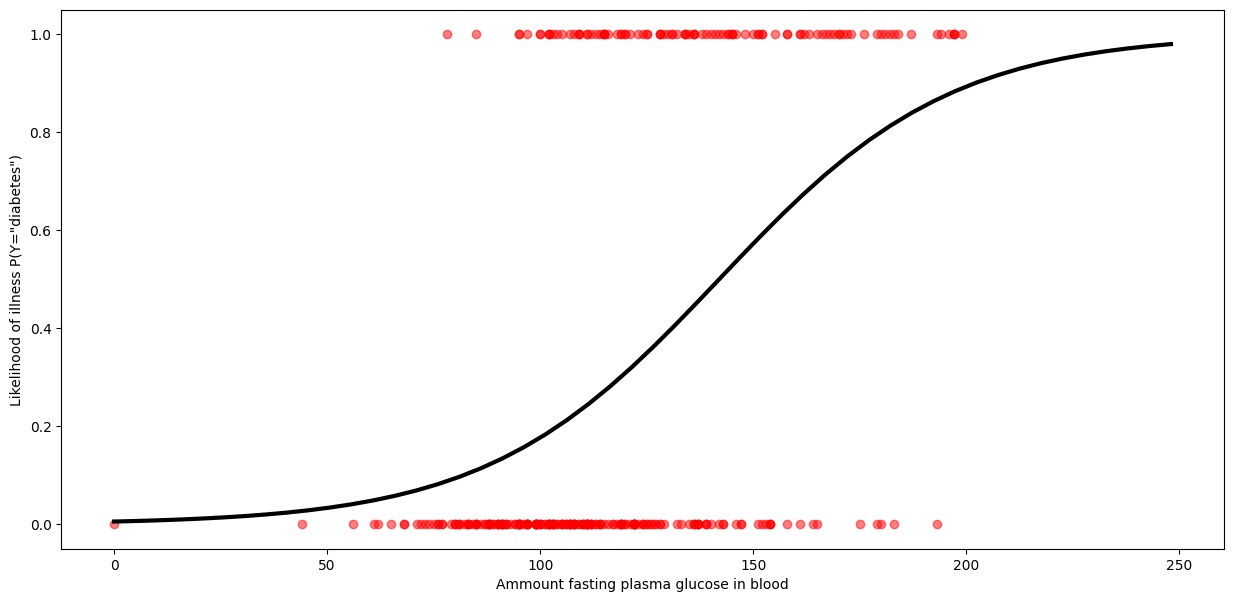

The classification accuracy for the fasting plasma glucose logistic regression classifier is 74.68%

Logistic function:  P(Y="diabetes")= 1/(1+exp^(-(0.0366 x - 5.2028)))


In [15]:
# Divide data to teaching data and test data
data_teaching, data_test, classes_teaching, classes_test = train_test_split(data, classes, test_size=0.4, random_state=0)

# Convert teaching data for fasting plasma glucose in right format
fasting_plasma_glucose_teaching = np.reshape(data_teaching[:,1], (-1,1))

# Convert test data for fasting plasma glucose in right format
fasting_plasma_glucose_test = np.reshape(data_test[:,1], (-1,1))

# Initialize the classifier
classifier_fasting_plasma_glucose = LogisticRegression()

# Teach logistic regression classifier for fasting plasma glucose
classifier_fasting_plasma_glucose.fit(fasting_plasma_glucose_teaching, classes_teaching)

# Predict classes for test data samples
classes_fasting_plasma_glucose_predicted = classifier_fasting_plasma_glucose.predict(fasting_plasma_glucose_test)

# Calculate classification accuracy for fasting plasma glucose's logistic regression classifier
classification_accuracy_fasting_plasma_glucose = accuracy_score(classes_test, classes_fasting_plasma_glucose_predicted)

def logistic_sigmoid_function(X, a, b):
    """
    In this function logistic regression's classifier is calculated according to sigmoid function
    """
    return 1/(1+np.exp(-(a*X+b)))

# Draw fitted function and place test data samples to same graph
plt.plot(fasting_plasma_glucose_test, classes_test, 'o', c='r', alpha=0.5)
X_fasting_plasma_glucose = np.linspace(min(fasting_plasma_glucose_teaching), max(fasting_plasma_glucose_teaching)+50)
Y_fasting_plasma_glucose  = logistic_sigmoid_function(X_fasting_plasma_glucose, classifier_fasting_plasma_glucose.coef_, classifier_fasting_plasma_glucose.intercept_).ravel()
plt.plot(X_fasting_plasma_glucose, Y_fasting_plasma_glucose, color='k', linewidth=3)
plt.xlabel('Ammount fasting plasma glucose in blood')
plt.ylabel('Likelihood of illness P(Y="diabetes")')
plt.show()

print('The classification accuracy for the fasting plasma glucose logistic regression classifier is {}%'.format(round(100*classification_accuracy_fasting_plasma_glucose,2)))

def sign(number):
    """
    In this function we get sign of equation parameter for printing
    """
    if number >= 0:
        return '+'
    return '-'

# Print the logistic equation of the logistic regression classifier for fasting plasma glucose
print('\nLogistic function:  P(Y="diabetes")= 1/(1+exp^(-({} x {} {})))'.format(round(classifier_fasting_plasma_glucose.coef_[0][0],4), sign(classifier_fasting_plasma_glucose.intercept_[0]), abs(round(classifier_fasting_plasma_glucose.intercept_[0],4))))

In the same way teach a logistic regression classifier for a weight index, predict classes for test data samples, and calculate classification accuracy.

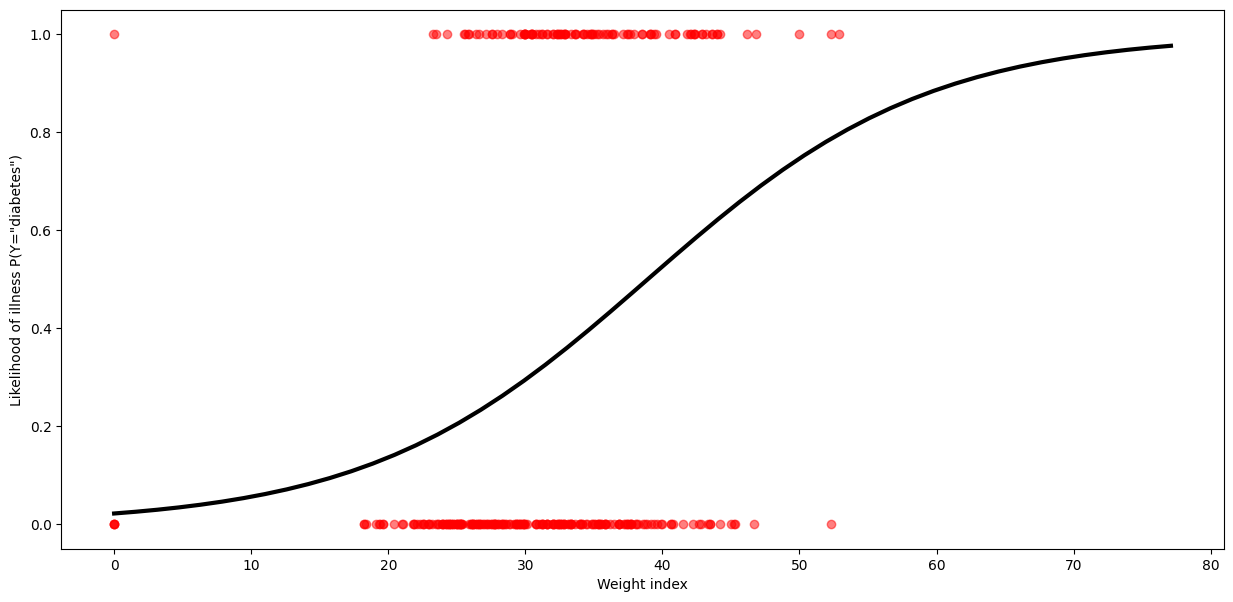

The classification accuracy for the weight index logistic regression classifier is 68.51%

Logistic function:  P(Y="diabetes")= 1/(1+exp^(-(0.0976 x - 3.7987)))


In [16]:
# Convert teaching data for weight index in right format
weight_index_teaching = np.reshape(data_teaching[:,5], (-1,1))

# Convert test data for weight index in right format
weight_index_test = np.reshape(data_test[:,5], (-1,1))

# Initialize classifier
classifier_weight_index = LogisticRegression()

#-------- Your code here --------
# Teach logistic regression classifier for weight index (Hint: .fit(teaching_data, classes_teaching_data))
classifier_weight_index.fit(weight_index_teaching, classes_teaching)
################################################################################

# Predict classes for test data samples (Hint: .predict(testdata))
classes_weight_index_predicted = classifier_weight_index.predict(weight_index_test)#######################################################
# Calculate classification accuracy for weight index's logistic regression classifier (Hint: accuracy_score(classes_test_data, classes_predicted))
classification_accuracy_weight_index = accuracy_score(classes_test, classes_weight_index_predicted)###############################################
#-----------------------------------

# Draw fitted function and place test data samples to same graph
plt.plot(weight_index_test, classes_test, 'o', c='r', alpha=0.5)
X_weight_index = np.linspace(min(weight_index_teaching), max(weight_index_teaching)+10)
Y_weight_index = logistic_sigmoid_function(X_weight_index, classifier_weight_index.coef_, classifier_weight_index.intercept_).ravel()
plt.plot(X_weight_index, Y_weight_index, color='k', linewidth=3)
plt.xlabel('Weight index')
plt.ylabel('Likelihood of illness P(Y="diabetes")')
plt.show()

print('The classification accuracy for the weight index logistic regression classifier is {}%'.format(round(100*classification_accuracy_weight_index,2)))

# Print the logistic equation of the logistic regression classifier for weight index
print('\nLogistic function:  P(Y="diabetes")= 1/(1+exp^(-({} x {} {})))'.format(round(classifier_weight_index.coef_[0][0],4), sign(classifier_weight_index.intercept_[0]), abs(round(classifier_weight_index.intercept_[0],4))))

Finally, teach the logistic regression classifier of the two variables (fasting plasma glucose and body mass index), predict the categories of test data for the samples, and calculate the classification accuracy. Combine both variables in teaching data and test data.

In [17]:
# Combine both variables in teaching data
combined_teaching = np.concatenate((fasting_plasma_glucose_teaching, weight_index_teaching), axis=1)

# combine both variables in test data Yhdistetään testidataan molemmat muuttujat
combined_test = np.concatenate((fasting_plasma_glucose_test, weight_index_test), axis=1)

# Initialize classifier
classifier_combined = LogisticRegression()

#-------- Your code here --------
# Teach logistic regression classifier for combined data (Hint: .fit(teaching_data, classes_teaching_data))
classifier_combined.fit(combined_teaching, classes_teaching)
#############################################################################
# Predict classes for test data samples (Hint: .predict(testdata))
classes_combined_predicted = classifier_combined.predict(combined_test)####################################

# Calculate classification accuracy for combined data's logistic regression classifier (Hint: accuracy_score(classes_test_data, classes_predicted))
classification_accuracy_combined = accuracy_score(classes_test, classes_combined_predicted)##################################
#-----------------------------------

print('The classification accuracy for the two-variable logistic regression classifier is {}%'.format(round(100*classification_accuracy_combined,2)))
# Print the logistic equation of the logistic regression classifier for combined data
print('\nLogistic function:  P(Y="diabetes")= 1/(1+exp^(-({} x1 {} {} x2 {} {})))'.format(round(classifier_combined.coef_[0][0],4), sign(classifier_combined.coef_[0][1]), abs(round(classifier_combined.coef_[0][1],4)), sign(classifier_combined.intercept_[0]), abs(round(classifier_combined.intercept_[0],4))))

The classification accuracy for the two-variable logistic regression classifier is 76.62%

Logistic function:  P(Y="diabetes")= 1/(1+exp^(-(0.0335 x1 + 0.0777 x2 - 7.3692)))


In [18]:
# Print the classification accuracies
print('Classification Accuracy - Fasting Plasma Glucose Classifier: {}%'.format(round(100 * classification_accuracy_fasting_plasma_glucose, 2)))
print('Classification Accuracy - Body Mass Index Classifier: {}%'.format(round(100 * classification_accuracy_weight_index, 2)))
print('Classification Accuracy - Combined Classifier: {}%'.format(round(100 * classification_accuracy_combined, 2)))


Classification Accuracy - Fasting Plasma Glucose Classifier: 74.68%
Classification Accuracy - Body Mass Index Classifier: 68.51%
Classification Accuracy - Combined Classifier: 76.62%


**Which of the taught classifiers worked best in terms of classification accuracy?**

`Combined Classifier has the highest accuracy of 76.62%.`

Visualize two-dimensional test data and the class boundary of a two-variable classifier into a two-dimensional coordinate system.

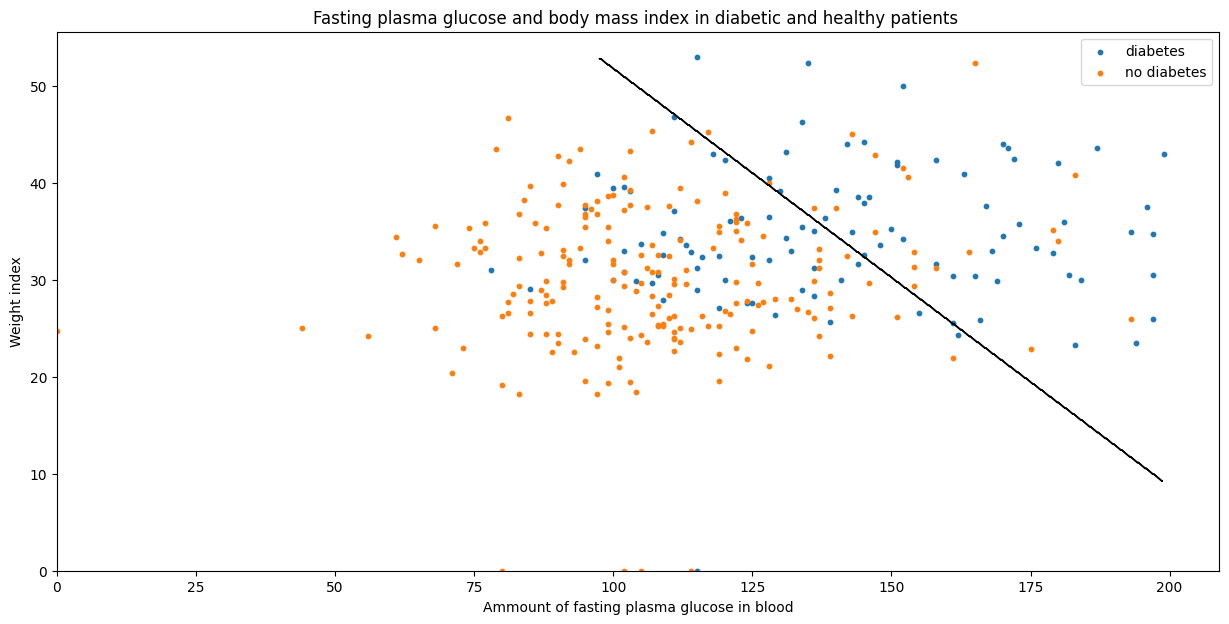

In [19]:
# Place samples of test data on a graph for diabetic and healthy patients
plt.scatter(combined_test[np.where(classes_test==1), 0], combined_test[np.where(classes_test==1), 1], s=10, label='diabetes')
plt.scatter(combined_test[np.where(classes_test==0), 0], combined_test[np.where(classes_test==0), 1], s=10, label='no diabetes')
plt.title('Fasting plasma glucose and body mass index in diabetic and healthy patients ')
plt.xlabel('Ammount of fasting plasma glucose in blood')
plt.ylabel('Weight index')
plt.legend()

def draw_classifier_class_bound(classifier, X):
    """
    In this function the class boundary of the classifier is drawn on a two-dimensional graph
    """
    x_min, x_max = X[:,0].min(), X[:,0].max()
    y_min, y_max = X[:,1].min(), X[:,1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.1))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)

draw_classifier_class_bound(classifier_combined, combined_test)
plt.show()

When a woman from the Pima Indian family who comes to the reception has a body mass index of 25 and a fasting plasma glucose level of 180 mg / dL, what is the probability that the patient has diabetes? Use the two-variable logistic regression classifier classifier_connected. [predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) function to predict the posterior probabilities of classes.

In [20]:
patient_data = [[180,25]]
#-------- Your code here --------
posterior_probability = classifier_combined.predict_proba(patient_data)########################################
#-----------------------------------
print('The patient has a {}% posterior probability of developing diabetes'.format(round(100*posterior_probability[0][1],2)))

The patient has a 64.51% posterior probability of developing diabetes


# Feedback
Finally answer the following questions

**How much time did you spent on this exercise?**

`Your answer here`

**Did you face any problems during this exercise? Was notebook material enough for doing this exercise?**

`Your answer here`

**Other feedback related to this exercise**

`Your answer here`

# Returning the exercise

1. Before you return this notebook **make sure that code in notebook works properly** and returns all necessary values by choosing from menu `Kernel -> Restart & Run All`! also make sure you have answer all questions on **bold**
2. Empty all outputs and variables by choosing from menu `Kernel -> Restart & Clear Output`. This step reduces the size of notebook remarkably
3. Rename this notebook in following format **`JT_H2_[student_number(s)].ipynb`** (e.g `JT_H2_1234567.ipynb` or if you have group `JT_H2_1234567_2345678_3456789.ipynb`)
4. Return **only** solved notebook(`file ending with .ipynb`) to moodle programming exercise 1. Everyone must return file to moodle even if you work in a group. **Don't include working directory or other files** when you return the exercise.
5. Finally go answer questions in moodle related to programming exercise 2. Everyone in your group must answer to questions.